In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pysindy as ps
import torch

# Task 2

In [3]:
from pde_find import PDE_FIND, PDE_FIND
from trainer import train, test

### File 1

In [30]:
data = PDE_FIND('1')

{'u': 0, 'x': 1, 't': 2}
torch.Size([3, 256, 101])


In [31]:
classify = {
    'dep': ['u'],
    'indep': ['x', 't'],
}
data.create_list_of_possible_terms(classify)

In [32]:
derivatives = data.get_derivatives(classify)

In [33]:
derivatives['u_x'].shape

torch.Size([1, 256, 101])

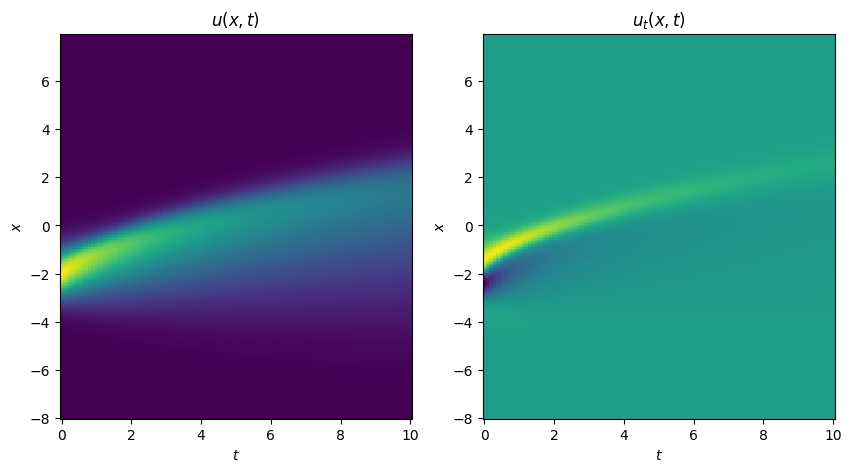

In [35]:
fig = data.plot(derivatives['u_t'], 'u_t')

In [9]:
components = data.create_feature_library(classify, derivatives)

17


In [10]:
(components[0] == data.u).all()

tensor(True)

In [11]:
weights = train(components, derivatives['u_t'], epochs=10000)

Epoch 0, loss 7.173046112060547
Epoch 1000, loss 0.012231586501002312
Epoch 2000, loss 0.012037134729325771
Epoch 3000, loss 0.011974107474088669
Epoch 4000, loss 0.011978312395513058
Epoch 5000, loss 0.011997283436357975
Epoch 6000, loss 0.012004434131085873
Epoch 7000, loss 0.01200047042220831
Epoch 8000, loss 0.012000450864434242
Epoch 9000, loss 0.011996577493846416


In [12]:
result = test(components, weights)

In [13]:
# select the terms that are not zero
# format weight in scientific notation
used = [f'{weight:.2e}*{term}' for term, weight in zip(classify['terms'], weights) if weight != 0]

In [14]:
used

['-5.78e-04*u',
 '5.63e-04*u_x',
 '1.00e-01*u_xx',
 '6.73e-04*u*u',
 '-1.00e+00*u*u_x',
 '1.37e-03*u*u_xx',
 '5.01e-03*u_x*u_x',
 '-1.74e-03*u_x*u_xx',
 '1.27e-05*u_x*u*u',
 '-8.72e-03*u_x*u*u_x',
 '1.29e-02*u_x*u*u_xx',
 '-9.48e-04*u_xx*u_xx',
 '-8.72e-03*u_xx*u*u',
 '-1.13e-02*u_xx*u*u_x',
 '-2.80e-03*u_xx*u*u_xx',
 '3.74e-03*u_xx*u_x*u_x',
 '-1.55e-03*u_xx*u_x*u_xx']

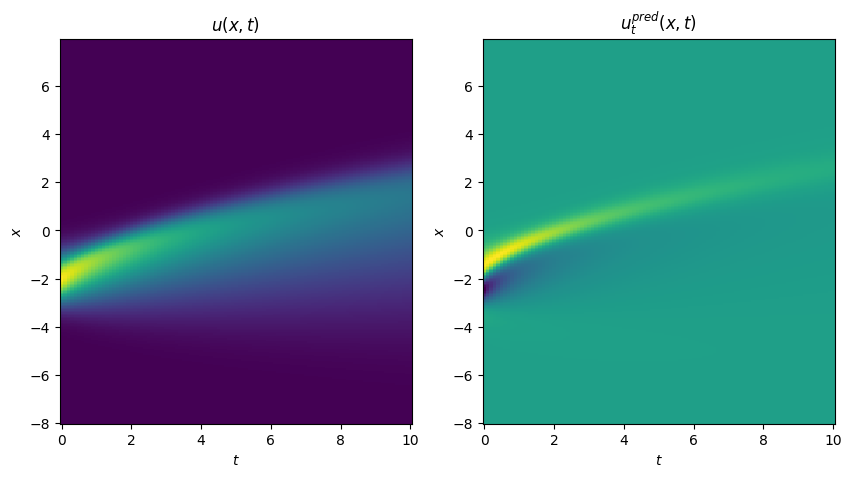

In [15]:
fig = data.plot(result.detach(), 'u_t^{pred}')

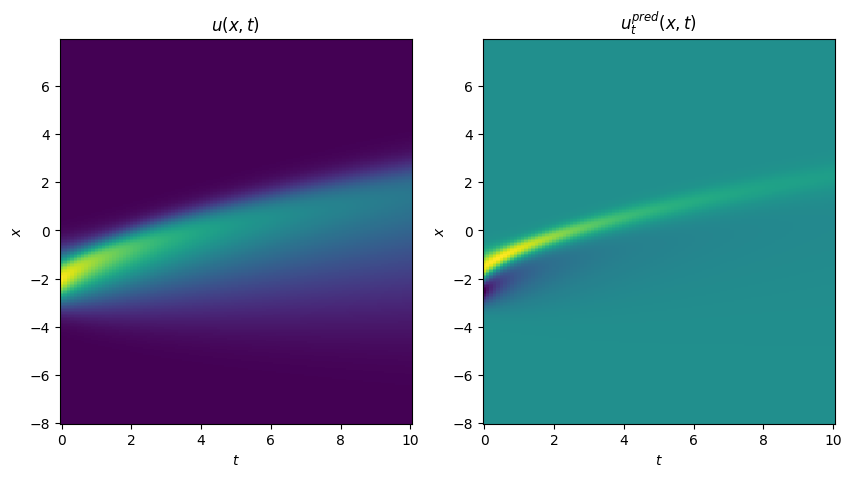

In [16]:
fig = data.plot(-components[4], 'u_t^{pred}')

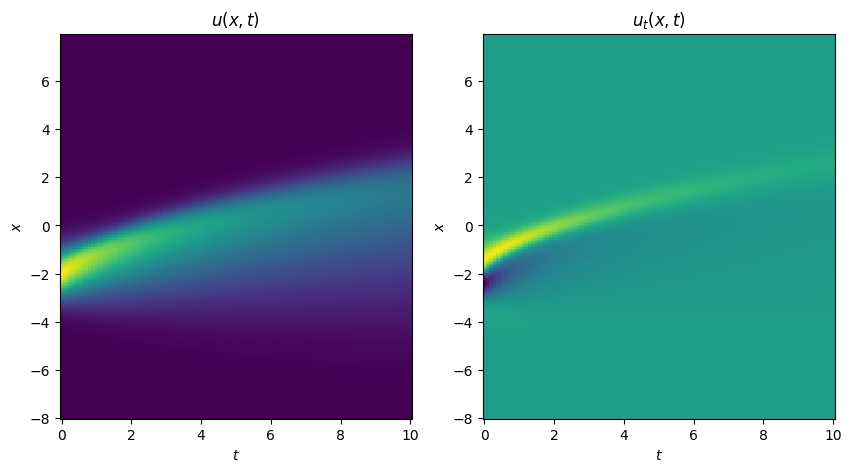

In [17]:
fig = data.plot(derivatives['u_t'], 'u_t')

#### File 2

In [17]:
data = PDE_FIND('2')

{'u': 0, 'x': 1, 't': 2}
torch.Size([3, 512, 201])


In [18]:
classify = {
    'dep': ['u'],
    'indep': ['x', 't'],
}
data.create_list_of_possible_terms(classify)

In [19]:
derivatives = data.get_derivatives(classify)

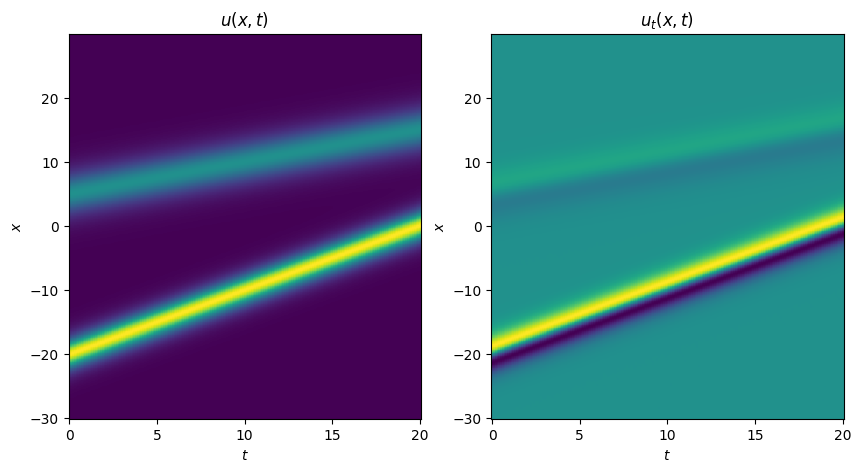

In [28]:
fig = data.plot(derivatives['u_t'], 'u_t')

In [21]:
components = data.create_feature_library(classify, derivatives)

17


In [22]:
weights = train(components, derivatives['u_t'], epochs=4000)

Epoch 0, loss 0.21647636592388153
Epoch 1000, loss 0.01650654897093773
Epoch 2000, loss 0.0166811291128397
Epoch 3000, loss 0.01669660396873951


In [23]:
result = test(components, weights)

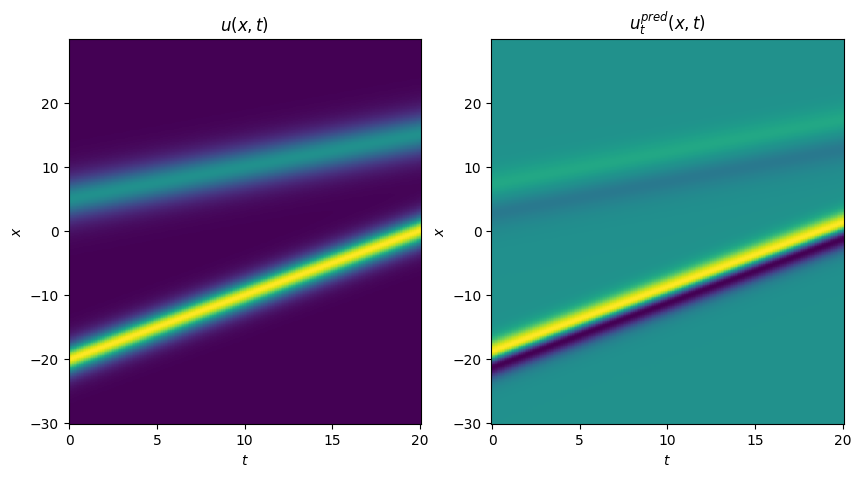

In [24]:
fig = data.plot(result.detach(), 'u_t^{pred}')

In [25]:
used = [f'{weight:.2e}*{term}' for term, weight in zip(classify['terms'], weights) if weight != 0]
used

['8.46e-03*u',
 '-5.87e-01*u_x',
 '-1.05e-02*u_xx',
 '-3.46e-02*u*u',
 '2.08e+00*u*u_x',
 '1.45e-01*u*u_xx',
 '-2.64e-01*u_x*u_x',
 '-9.04e+00*u_x*u_xx',
 '-9.94e+00*u_x*u*u',
 '8.74e-01*u_x*u*u_x',
 '6.03e+00*u_x*u*u_xx',
 '1.58e-01*u_xx*u_xx',
 '-4.37e-01*u_xx*u*u',
 '7.81e+00*u_xx*u*u_x',
 '-5.53e-01*u_xx*u*u_xx',
 '7.71e-01*u_xx*u_x*u_x',
 '8.72e+00*u_xx*u_x*u_xx']

### File 3

In [49]:
dif3 = DifEq3('3')

{'u': 0, 'v': 1, 'x': 2, 'y': 3, 't': 4}
torch.Size([5, 256, 256, 201])


In [27]:
# anim_u = dif3.animate(0)
# # Takes around 1 min 40 secs to save
# anim_u.save('eq3_u.gif', fps=30)}

In [ ]:
# anim_v = dif3.animate(1)
# anim_v.save('eq3_v.gif', fps=30)

In [50]:
classify = {
    'dep': ['u', 'v'],
    'indep': ['x', 'y', 't'],
}
dif3.create_list_of_possible_terms(classify)

In [51]:
classify

{'dep': ['u', 'v'],
 'indep': ['x', 'y', 't'],
 'derivatives': ['u_x',
  'u_xx',
  'u_xy',
  'u_y',
  'u_yy',
  'u_t',
  'v_x',
  'v_xx',
  'v_xy',
  'v_y',
  'v_yy',
  'v_t'],
 'terms': ['u',
  'v',
  'u_x',
  'u_xx',
  'u_xy',
  'u_y',
  'u_yy',
  'v_x',
  'v_xx',
  'v_xy',
  'v_y',
  'v_yy',
  'v_t',
  'u*u',
  'u*v',
  'u*u_x',
  'u*u_xx',
  'u*u_xy',
  'u*u_y',
  'u*u_yy',
  'u*v_x',
  'u*v_xx',
  'u*v_xy',
  'u*v_y',
  'u*v_yy',
  'v*v',
  'v*u_x',
  'v*u_xx',
  'v*u_xy',
  'v*u_y',
  'v*u_yy',
  'v*v_x',
  'v*v_xx',
  'v*v_xy',
  'v*v_y',
  'v*v_yy',
  'v*u*u',
  'v*u*v',
  'v*u*u_x',
  'v*u*u_xx',
  'v*u*u_xy',
  'v*u*u_y',
  'v*u*u_yy',
  'v*u*v_x',
  'v*u*v_xx',
  'v*u*v_xy',
  'v*u*v_y',
  'v*u*v_yy',
  'u_x*u_x',
  'u_x*u_xx',
  'u_x*u_xy',
  'u_x*u_y',
  'u_x*u_yy',
  'u_x*v_x',
  'u_x*v_xx',
  'u_x*v_xy',
  'u_x*v_y',
  'u_x*v_yy',
  'u_x*u*u',
  'u_x*u*v',
  'u_x*u*u_x',
  'u_x*u*u_xx',
  'u_x*u*u_xy',
  'u_x*u*u_y',
  'u_x*u*u_yy',
  'u_x*u*v_x',
  'u_x*u*v_xx',
  'u_x*

In [55]:
derivatives = dif3.get_derivatives(classify)

In [56]:
components = data.create_feature_library(classify, derivatives)

663


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (2, 1, 256) + inhomogeneous part.